In [4]:
%cd /content/drive/MyDrive/multi/0427

/content/drive/MyDrive/multi/0427


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)

In [7]:
wine.data.shape

(178, 13)

### 차원 축소
- 13차원 -> 2차원, 4차원, 6차원

In [9]:
# 2차원 변환
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
wine_pca2 = pca2.fit_transform(wine_std)
wine_pca2.shape

(178, 2)

In [11]:
pca2.explained_variance_ratio_.sum()

0.5540633835693534

In [12]:
# 4차원 변환
pca4 = PCA(n_components=4)
wine_pca4 = pca4.fit_transform(wine_std)
wine_pca4.shape

(178, 4)

In [13]:
pca4.explained_variance_ratio_.sum()

0.735989990758993

In [15]:
# 6차원 변환
pca6 = PCA(n_components=6)
wine_pca6 = pca6.fit_transform(wine_std)
wine_pca6.shape

(178, 6)

In [16]:
pca6.explained_variance_ratio_.sum()

0.8509811607477046

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target
)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca4, wine.target, stratify=wine.target
)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9777777777777777

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca6, wine.target, stratify=wine.target
)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9777777777777777

### 3. 시각화

In [27]:
df = pd.DataFrame(wine_pca2, columns=['PC1','PC2'])
df['target'] = wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


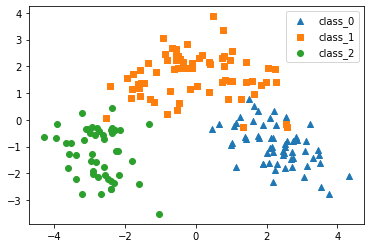

In [29]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])

plt.legend()
plt.show()